# Useful Code Snippets
### Distributed Information Systems

### Tutorial 01: Trajectories

In [4]:
# Import libraries
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import data
FILE = 'week 1/taxi_log.txt'
df = pd.read_csv(FILE, names = ['tid','timestamp','x','y'])

In [ ]:
# Filter based on column value
df_filtered = df[df['x']<116.5]

In [ ]:
# Explode
df = (dt_new.set_index(['route_id', 'taxi_id', 'passenger_count', 'start_point', 'end_point'])
   .explode('route')
   .reset_index())

# Create column from element in a list in another column 
df['latitude'] = df['route'].apply(lambda x:x[0])
df['longitude'] = df['route'].apply(lambda x:x[1])

# Merge based on two columns
df = df.merge(dt, how='inner', left_on=['latitude', 'longitude'], right_on=['x','y'])

# Drop inplace
df.drop(columns=['start_point', 'end_point','route', 'tid', 'x', 'y'], inplace = True)

In [ ]:
# Sort
# sorted (iterable, reverse = False, key = optional sort key)
ls = sorted(ls, key=lambda tup: tup[0])

In [ ]:
# Measure performance
start = time.time()
# INSERT FUNCTION TO MEASURE HERE
end = time.time()
print("Duration: ", end - start)

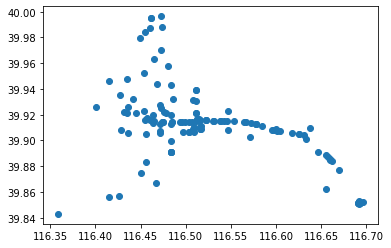

In [2]:
# Scatter plot
%matplotlib inline

x_l = list()
y_l = list()

for idx, row in dt.iterrows():
    x_l.append(row['x'])
    y_l.append(row['y'])

x = np.array(x_l)
y = np.array(y_l)

plt.scatter(x, y)
plt.show()

In [9]:
# the default model
class Trajectory:
    def __init__(self):
        """
        This class represents a trajectory.
        """
        self.path = dict()  # dict[str, tuple], represent the trajectory function as a dictionary (of sample values)
        self.timestamps = list()  # list[datetime.datetime] maintain sorted list of timestamps

    def add_point(self, ts, coord):
        """
        Adds a coordinate point in the Trajectory object.

        :param ts: str, timestamp of the coordinates
        :param coord: np.array, the coordinates
        """
        self.path[ts] = coord
        datetime_obj = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
        self.timestamps.append(datetime_obj)
        self.timestamps.sort()

    def get_location(self, ts):
        """
        Returns the location for a given timestamp if it exists.

        :param ts: str, the timestamp of the requested location
        :return: np.array, of the coordinates
        """
        return self.path.get(ts, None)

    def get_interpolated_location(self, ts):
        """
        Interpolates the positions, i.e. creating a new function in the model, based on data.

        :param ts: str, the timestamp of the requested location
        :return: np.array, of the coordinates of the interpolated location
        """
        ts = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')

        if self.timestamps[0] <= ts <= self.timestamps[-1]:
            idx = bisect(self.timestamps, ts)  # get index of the input timestamp in the sorted path

            # get neighbors based on the index
            previous_ts = self.timestamps[idx - 1]
            next_ts = self.timestamps[idx]

            previous_point = self.path[previous_ts.strftime('%Y-%m-%d %H:%M:%S')]
            next_point = self.path[next_ts.strftime('%Y-%m-%d %H:%M:%S')]

            return previous_point + ((previous_point - next_point) / (next_ts - previous_ts).total_seconds()) * (
                (ts - previous_ts).total_seconds())

        return None

    def extract_trips(self):
        """
        Extracting trips, i.e., creating a new representation for trajectories.

        :return: list of lists of np.arrays, with the [start, end] coordinates of the trips 
        """         
        trips = list()
        on_trip = True
        path = list(self.path.values())
        start = path[0]  # get first element
        for i in range(1, len(path)):
            current_point = path[i]
            previous_point = path[i-1]
            
            # compute euclidean distance
            distance = np.sqrt((current_point[0] - previous_point[0]) ** 2 + (current_point[1] - previous_point[1]) ** 2)
            
            if distance < 0.001:
                if on_trip:
                    on_trip = False
                    end = path[i]
                    trips.append((start, end))
            else:
                if not on_trip:
                    start = path[i + 1]
                    on_trip = True

        return trips

---

### Tutorial 02: Trajectories

#### Different datatypes representing the same model

In [57]:
# Dictionary
dict_tr = {}
dict_tr[0] = [0,0]
dict_tr[1] = [1,0]
dict_tr

{0: [0, 0], 1: [1, 0]}

In [13]:
# List
list_tr = []
list_tr.append([0,0])
list_tr.append([1,0])
list_tr

[[0, 0], [1, 0]]

In [3]:
# Dataframe
d = {0: [0, 0], 1: [1, 0]}
df = pd.DataFrame(data = d)
df

,0,1
0,0,1
1,0,0


---

### Tutorial 05: Word Embeddings

In [ ]:
# Generate emebeddings
import fasttext
model = fasttext.train_unsupervised('epfldocs.txt', model = 'cbow')
vocabulary = model.words
word_embeddings = np.array([model[word] for word in vocabulary])

# Reshape in given range
embedding.reshape((1,-1))

# Iterate over dictionary
for term, embedding in term_embeddings_dict.items():
    
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(input_term_embedding.reshape((1,-1)),embedding.reshape((1,-1))

---

### Tutorial 06: Link Based Ranking

In [ ]:
from __future__ import print_function, division
from numpy import linalg as LA

# L1 and L2 normalization
pr = np.array([1,2,3])
print("L1-norm of {0} is {1}".format(pr, pr / np.linalg.norm(pr,1)))
print("L2-norm of {0} is {1}".format(pr, pr / np.linalg.norm(pr,2)))

# PageRank
def pagerank_eigen(L):
#   Construct transition probability matrix from L
    R = L/L.sum(axis=0)
#     Compute eigen-vectors and eigen-values of R
    eigenvalues, eigenvectors = LA.eig(R)
    print(eigenvalues.argmax())
#     Take the eigen-vector with maximum eigven-value
    p = eigenvectors[:, np.argmax(np.absolute(eigenvalues))]
    return (R,p)

---

### Tutorial 07: Social Network Analysis

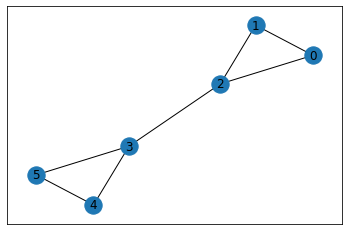

In [11]:
import networkx as nx

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]

# Visualize network
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

# Define communities
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1

In [16]:
node_1 = 1
node_2 = 2
# The community label of a node
G.nodes[node_1]['community']
# The degree of a node
G.degree[node_1]
# The neighbors of a node
G.neighbors(node_1)
# Number of edges between 2 nodes
G.number_of_edges(node_1, node_2)

1

---

### Tutorial 08: Transformer Models

---

### Tutorial 09: Recommender Systems

In [40]:
# Transpose matrix and then pairwise distances of the vectors
matrix = np.array([[1,2,3],[4,5,6],[7,2,3]])

from sklearn.metrics.pairwise import pairwise_distances
# transpose for item similarity
item_similarity = 1-pairwise_distances(matrix.T, metric='cosine')
# non transposes for user similarity
user_similarity = 1-pairwise_distances(matrix, metric='cosine')

# check how the matrix looks like
print(item_similarity)
print(user_similarity)

[[1.         0.77138922 0.80403025]
 [0.77138922 1.         0.99493668]
 [0.80403025 0.99493668 1.        ]]
[[1.         0.97463185 0.67884423]
 [0.97463185 1.         0.81048843]
 [0.67884423 0.81048843 1.        ]]


In [52]:
# compute the average ratings for each user (rowwise)
matrix = np.matrix([[1.0,2,0],[4,0,6],[7,2,3]])
tmp = matrix.copy()
tmp[tmp == 0] = np.nan
user_average_ratings = np.nanmean(tmp, axis=1)
item_average_ratings = np.nanmean(tmp, axis=0)
print("User average ratings: ", user_average_ratings)
print("Item average ratings: ", item_average_ratings)


User average ratings:  [[1.5]
 [5. ]
 [4. ]]
Item average ratings:  [[4.  2.  4.5]]


In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# use non-zero and flatten before calculating RSME
pred = np.array([[1.0,2,0],[5,0,9],[7,2,3]])
gt = np.array([[1.0,2,0],[4,0,6],[7,2,3]])

prediction = pred[gt.nonzero()].flatten()
ground_truth = gt[gt.nonzero()].flatten()
    
rsme = sqrt(mean_squared_error(ground_truth, prediction))
rsme

1.1952286093343936

---

### Tutorial 10: Association Rules

In [80]:
import pandas as pd
from mlxtend.frequent_patterns import apriori as mx_apriori

def print_support_mx(df,max_display=10,min_items=1):
    print('support\t itemset')
    print('-'*30)
    lenrow = df['itemsets'].apply(lambda x: len(x))
    df  = df[lenrow>=min_items]
    df  = df.sort_values('support',ascending=False).iloc[:max_display]
    for i,row in df.iterrows():
        print("%.2f" % float(row['support']),'\t',set(row['itemsets']))

# Open and split .csv
dataset = [ l.strip().split(',') for i,l in enumerate(open('week 10/groceries.csv').readlines())]
dataset

# Using mlextend
df_dummy = pd.get_dummies(pd.Series(dataset).apply(pd.Series).stack()).sum(level=0)
frequent_itemsets = mx_apriori(df_dummy, min_support=0.01, use_colnames=True)
print_support_mx(frequent_itemsets,10,min_items=2)

/var/folders/xv/b7jbw07x0xv3d5x__jtrxv8r0000gn/T/ipykernel_34414/1950362806.py:18: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_dummy = pd.get_dummies(pd.Series(dataset).apply(pd.Series).stack()).sum(level=0)


support	 itemset
------------------------------
0.07 	 {'other vegetables', 'whole milk'}
0.06 	 {'rolls/buns', 'whole milk'}
0.06 	 {'yogurt', 'whole milk'}
0.05 	 {'root vegetables', 'whole milk'}
0.05 	 {'root vegetables', 'other vegetables'}
0.04 	 {'other vegetables', 'yogurt'}
0.04 	 {'rolls/buns', 'other vegetables'}
0.04 	 {'whole milk', 'tropical fruit'}
0.04 	 {'soda', 'whole milk'}
0.04 	 {'rolls/buns', 'soda'}


In [82]:
from mlxtend.frequent_patterns import association_rules as mx_association_rules

def print_rules_mx(df,max_display=10):
    print('confidence\t rule')
    print('-'*30)
    df  = df.sort_values('confidence',ascending=False).iloc[:max_display]
    for i,row in df.iterrows():
        print("%.2f" % float(row['confidence']),'\t',set(row['antecedents']),'->',set(row['consequents']))

# Using mlextend
rules_mx = mx_association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print_rules_mx(rules_mx,max_display=10)

confidence	 rule
------------------------------
0.59 	 {'root vegetables', 'citrus fruit'} -> {'other vegetables'}
0.58 	 {'root vegetables', 'tropical fruit'} -> {'other vegetables'}
0.58 	 {'curd', 'yogurt'} -> {'whole milk'}
0.57 	 {'butter', 'other vegetables'} -> {'whole milk'}
0.57 	 {'root vegetables', 'tropical fruit'} -> {'whole milk'}
0.56 	 {'root vegetables', 'yogurt'} -> {'whole milk'}
0.55 	 {'other vegetables', 'domestic eggs'} -> {'whole milk'}
0.52 	 {'whipped/sour cream', 'yogurt'} -> {'whole milk'}
0.52 	 {'rolls/buns', 'root vegetables'} -> {'whole milk'}
0.52 	 {'pip fruit', 'other vegetables'} -> {'whole milk'}


---

### Tutorial 11: Semantic Web

In [1]:
statements = []
#statement template: {'s':'', 'p':'', 'o':''}
statements.append({'s':'Aphrodie', 'p':'isa', 'o':'God'})
statements.append({'s':'Eros', 'p':'isa', 'o':'God'})
statements.append({'s':'Aphrodie', 'p':'isParentOf', 'o':'Eros'})
statements.append({'s':'Aphrodie', 'p':'isa', 'o':'beautiful'})
statements.append({'s':'Aphrodie', 'p':'isa', 'o':'happy'})
statements

[{'s': 'Aphrodie', 'p': 'isa', 'o': 'God'},
 {'s': 'Eros', 'p': 'isa', 'o': 'God'},
 {'s': 'Aphrodie', 'p': 'isParentOf', 'o': 'Eros'},
 {'s': 'Aphrodie', 'p': 'isa', 'o': 'beautiful'},
 {'s': 'Aphrodie', 'p': 'isa', 'o': 'happy'}]

In [2]:
def query():
    results = []
    for s in statements:
        if s['p'] == 'isa' and s['o'] == 'happy':
            results.append(s['s'])
    print(results)

query()

['Aphrodie']


---

### Tutorial 12: Entity and Information Extraction

In [5]:
import urllib.request, json, csv, re
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
#read tsv with input movies
def read_tsv():
    movies=[]
    with open('week 12/movies.tsv','r') as file:
        tsv = csv.reader(file, delimiter='\t')
        next(tsv) #remove header
        movies = [{'movie':line[0], 'director':line[1]} for line in tsv]
    return movies

#parse wikipedia page
def parse_wikipedia(movie):
    txt = ''
    try:
        with urllib.request.urlopen('https://en.wikipedia.org/w/api.php?format=json&action=query&prop=extracts&exintro=&explaintext=&titles='+movie) as url:
            data = json.loads(url.read().decode())
            txt = next (iter (data['query']['pages'].values()))['extract']
    except:
        pass
    return txt

In [ ]:
# Using spacy find all entities with label PERSON
def find_PER_entities(txt):
    txt = nlp(txt)
    
    persons = []
    for e in txt.ents:
        if e.label_ == 'PERSON':
            persons.append(e.text)
    return persons

In [ ]:
#simple heuristic: find the next PER entity after the word 'directed'
def find_director(txt, persons):
     # replace special symbols with empty string and split at every whitespace
    txt = re.sub('[!?,.]', '', txt).split()
    for p1 in range(0, len(txt)):
        if(txt[p1] == 'directed'):
            for p2 in range(p1, len(txt)):
                for per in persons:
                    if per.startswith(txt[p2]):
                        return per
    # otherwise empty string that is used later
    return ''

In [ ]:
statements=[]
tp = 0
fp = 0
retrieved = 0
gt_directors = [m['director'] for m in movies if m.get('director')]
relevant = len(gt_directors)

for m in movies:
        # Wikipedia page for movie m
        txt = parse_wikipedia(m['movie'])
        # persons of movie m
        persons = find_PER_entities(txt)
        # finds director in persons by looking at first PER after "directed"
        director = find_director(txt, persons)
            
        if director != '':
            statements.append(m['movie'] + ' is directed by ' + director + '.')
            retrieved += 1
            if director == m['director']:
                tp +=1
            else:
                fp +=1

In [ ]:
# Compute precision and recall
fn = len(movies) - len(statements)

precision = tp / retrieved
# same as precision = tp / (tp + fp)

recall_IR = tp / relevant # relevant = len(movies)
recall_sample_sol = tp / (tp + fn) # fn = len(movies) - len(statements)


print(tp)

print ('Precision: {:.0%}'.format(precision))
print ('Recall Me: {:.0%}'.format(recall_IR))
print ('Recall: {:.0%}'.format(recall_sample_sol))
print('\n***Sample Statements***')
for s in statements[:5]:
    print (s)

In [ ]:
# Hidden Markov Model (HMM)

#Bigram Representation
def getBigrams(sents):
    return [b[0]+' '+b[1] for l in sents for b in zip(l.split(' ')[:-1], l.split(' ')[1:])]

training_set = "Insert sample text here."

bigrams = getBigrams(training_set)

# Smoothing factor
lambda_ = 0.5

#Transition Probabilities
transition_prob={}

#Prior
transition_prob['P(I|start)'] = I_count/ (I_count+O_count)
transition_prob['P(O|start)'] = 1 - transition_prob['P(I|start)']

# counting ...

#Emission Probabilities
emission_prob={}
        
default_emission = 1/len(bigrams) * (1 - lambda_)

# counting ...

#Prediction
test_set = "Some other text here."

bigrams = getBigrams(test_set)
entities=[]
prev_state='start'
for b in bigrams:
    I_prob = transition_prob['P(I|'+prev_state+')'] * emission_prob['P('+str(sum(1 for c in b if c.isupper()))+'_upper|I)']
    O_prob = transition_prob['P(O|'+prev_state+')'] * emission_prob['P('+str(sum(1 for c in b if c.isupper()))+'_upper|O)']
    
    if I_prob > O_prob:
        entities.append(b)
        prev_state = 'I'
    else:
        prev_state = 'O'

print('Predicted Entities\n', entities, '\n')


---

### Numpy Operations

In [54]:
# dot product
c = np.matrix([[1, 2], [3, 4]])
d = np.matrix([[5, 6, 7], [8, 9, 10]])
print(c)
print(d)
print("\ndot product of two matrix objects")
print(np.dot(c, d))

# transpose
a = np.array([[1, 2], [3, 4], [5, 6]])
print("a = ")
print(a)

print("\nWith np.transpose(a) function")
print(np.transpose(a))

print("\nWith ndarray.transpose() method")
print(a.transpose())

# trace (sum of diagonal)
print("\nTrace:", a.trace())

# rank (maximum number of linearly independent column vectors or row vectors)
rank = np.linalg.matrix_rank(a)
print("\nRank:", rank)

# determinant of a square matrix
# if det = 0, matrix is not invertible
a = np.array([[2, 2, 1],
               [1, 3, 1],
               [1, 2, 2]])
det = np.linalg.det(a)
print("\nDeterminant:", np.round(det))

# flatten
print(a.flatten())

# absoulute values
a = np.array([[2, -2, 1],
               [1, -3, 1],
               [-1, 7, 2]])
print("\nAbsolute: \n", np.abs(a))

# clip values
print("\nClipped to range 0-5: \n", a.clip(0,5))

[[1 2]
 [3 4]]
[[ 5  6  7]
 [ 8  9 10]]

dot product of two matrix objects
[[21 24 27]
 [47 54 61]]
a = 
[[1 2]
 [3 4]
 [5 6]]

With np.transpose(a) function
[[1 3 5]
 [2 4 6]]

With ndarray.transpose() method
[[1 3 5]
 [2 4 6]]

Trace: 5

Rank: 2

Determinant: 5.0
[2 2 1 1 3 1 1 2 2]

Absolute: 
 [[2 2 1]
 [1 3 1]
 [1 7 2]]

Clipped to range 0-5: 
 [[2 0 1]
 [1 0 1]
 [0 5 2]]


In [1]:
from __future__ import print_function, division

# L1 or L2 normalization
pr = np.array([1,2,3])
print("L1-norm of {0} is {1}".format(pr, pr / np.linalg.norm(pr,1)))
print("L2-norm of {0} is {1}".format(pr, pr / np.linalg.norm(pr,2)))

L1-norm of [1 2 3] is [0.16666667 0.33333333 0.5       ]
L2-norm of [1 2 3] is [0.26726124 0.53452248 0.80178373]


In [18]:
# Pearson Correlation Coefficient
x_simple = np.array([-2, -1, 0, 1, 2])
y_simple = np.array([4, 1, 3, 2, 0])
out = np.corrcoef(x_simple, y_simple)
out

array([[ 1. , -0.7],
       [-0.7,  1. ]])

In [76]:
# Open and split .csv
dataset = [ l.strip().split(',') for i,l in enumerate(open('week 10/groceries.csv').readlines())]
dataset

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

---

### Pandas Operations

In [23]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('week 9/data/ml-100k/u.data', sep='\t', names=header)
df

In [24]:
# Get amount of unique values per column
n_users = df['user_id'].nunique()
n_items = df['item_id'].nunique()
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

Number of users = 943 | Number of movies = 1682


In [29]:
# Iterate over df as tuples
for line in df.itertuples():
# line would look like this Pandas(Index=0, user_id=196, item_id=242, rating=3, timestamp=881250949)
    user = line[1]
    item = line[2]
    rating = line[3]

---

### Dictionary Operations

In [74]:
d = {1: "one", 2: "two"}

# Clears dictionary
d.clear()

d = {1: "one", 2: "two"}

# Add new item
d[3] = "three"

# Check if key is in dict
if 4 in d:
    print(d[4])
else:
    d[4] = "four"
    print(d[4])
    
# Function to return key for any value
def get_key(val, d):
    for key, value in d.items():
         if val == value:
             return key
 
    return "key doesn't exist"

# Check if value is in dict
if "four" in d.values():
    print(get_key("four", d))
else:
    d[4] = "four"
    
d

four
4


{1: 'one', 2: 'two', 3: 'three', 4: 'four'}